# <center>Laboratorium 3<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, dokonać testu na platformie github, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

Biblioteki niezbędne do wykonania zadania:

(instalacja: "pip install numpy scipy matplotlib memory_profiler")

In [1]:
import main

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

%load_ext memory_profiler

***Materiały przygotowujące:***
- Standard IEEE 754 [PL](https://pl.wikipedia.org/wiki/IEEE_754) [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Liczba zmiennoprzecinkowa [PL](https://pl.wikipedia.org/wiki/Liczba_zmiennoprzecinkowa) [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Arytmetyka zmiennoprzecinkowa [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Profilowanie kodu:***
- [timeit](https://docs.python.org/2/library/timeit.html) - profilowanie czasu wykonywania kodu 
- [memit](https://pypi.org/project/memory-profiler/) - profilowanie pamięci zużywanej przez kod

Zarówno timeit jak i memit wspierają magic command w Jupyter notebook, co obrazuje poniższy przykład:

In [ ]:
def func(size):
    a = np.random.random((size,size))
    b = np.random.random((size,size))
    c = a + b
    return c

for size in [100, 1000, 10000]:
    print('SIZE: ', size)
    print('Timing: ')
    saved_timing = %timeit -r 5 -n 10 -o func(size)
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
    print('Memory usage: ')
    %memit func(size)
    print('\n')

SIZE:  100
Timing: 
217 µs ± 31.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 91.42 MiB, increment: 0.44 MiB


SIZE:  1000
Timing: 
23.7 ms ± 585 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Memory usage: 
peak memory: 114.32 MiB, increment: 22.90 MiB


SIZE:  10000
Timing: 


KeyboardInterrupt: 

***Zadanie 1.***  
Zaimplementuj funkcje obliczające błąd względny i bezwzględny (*relative_error* i *absolut_error*).
Funkcje przyjmują 2 argumenty: wartość dokładną oraz wartość przybliżoną, zwracając wartość błędu.
Implementacja powinna obsługiwać zarówno wartości skalarne, listy oraz wektory i macierze typu np.array z zachowaniem zasad [broadcastingu](https://numpy.org/doc/stable/user/basics.broadcasting.html).

**Wskazówka** Wykorzystuj funkcje *relative_error* i *absolut_error* w dalszej części laboratorium do analizy błędów.

In [2]:
from typing import Union, List, Tuple
def absolut_error(v: Union[int, float, List, np.ndarray], v_aprox: Union[int, float, List, np.ndarray]) -> Union[int, float, np.ndarray]:
    if isinstance(v, (int, float, list, np.ndarray)) and isinstance(v_aprox, (int, float, list, np.ndarray)):
        if isinstance(v, (int, float)) and isinstance(v_aprox, list):
            lst = np.zeros(len(v_aprox))
            for i in range(len(v_aprox)):
                lst[i] = np.abs(v - v_aprox[i])
            return lst
            
        elif isinstance(v, list) and isinstance(v_aprox, list):
            if len(v) == len(v_aprox):
                lst = np.zeros(len(v_aprox))
                for i in range(len(v)):
                    lst[i] = np.abs(v[i] - v_aprox[i])
                return lst
            else:
                return np.NaN
                
        elif isinstance(v, np.ndarray) and isinstance(v_aprox, np.ndarray):
            if all((m == n) or (m == 1) or (n == 1) for m, n in zip(v.shape[::-1], v_aprox.shape[::-1])):
                return np.abs(v - v_aprox)
            else:
                return np.NaN

        else:
            return np.abs(v - v_aprox)
    else:
        return np.NaN


def relative_error(v: Union[int, float, List, np.ndarray], v_aprox: Union[int, float, List, np.ndarray]) -> Union[int, float, np.ndarray]:
    if isinstance(v, (int, float, list, np.ndarray)) and isinstance(v_aprox, (int, float, list, np.ndarray)):
        numerator = absolut_error(v, v_aprox)
        if numerator is np.NaN or (isinstance(v, (int, float)) and v == 0):
            return np.NaN
    
        elif isinstance(v, np.ndarray):
            return np.divide(numerator, v)

        elif isinstance(numerator, np.ndarray) and isinstance(v, list):
            lst = np.zeros(len(v))
            for i in range(len(v)):
                if v[i] == 0:
                    return np.NaN
                lst[i] = numerator[i] / v[i]
            return lst

        else:
            return numerator / v
    else:
        return np.NaN

Zaimplementowano funkcje obliczające błąd względny i bezwzględny. Zadanie okazało się niełatwe, ponieważ należało rozważyć wiele przypadków ze względu na różne rodzaje danych wejściowych (wartości skalarne, listy, wektory itp.)

***Zadanie 2.***  
Zaimplementuj funkcje *p_diff*, która przyjmuje jako parametry wartości całkowite $n$ i rzeczywiste $c$ oraz zwraca różnicę (co do wartości bezwzględnej)   dwóch wyrażeń $P_1$ oraz $P_2$:  
  
a) $P_1 = b - b + c $  
b) $P_2 = b + c - b $  
  
gdzie $b = 2^n$

Analizując różnicę w otrzymanych wynikach zastosuj warotści:  
- $n \in \{1,2,3... 50\}$
- $c \in \{0.1, 0.125, 0.25, 0.33, 0.5, 0.6\}$
 
Następnie odpowiedź i zilustruj wykresami pytania:

1. Jaki wynik powinniśmy otrzymać?
2. Które z liczb mają skończoną a które nieskończoną reprezentację?    
3. Dlaczego wyniki się od siebie różnią?    
4. Jaki typ błędu tutaj występuje?
5. Czy istnieje możliwość poprawy działania tych wyrażeń, jeżeli tak to w jaki sposób?  


In [ ]:
def p_diff(n: int, c: float) -> float:
    if isinstance(n, int) and isinstance(c, (int, float)):
        b = 2 ** n
        P1 = b - b + c
        P2 = b + c - b
        return np.abs(P1 - P2)
    else:
        return np.NaN


for n in range(51):
    c = 0.1
    print(f"Dla n = {n}, c = {c}, p_diff = {p_diff(n, c)}")
for n in range(51):
    c = 0.125
    print(f"Dla n = {n}, c = {c}, p_diff = {p_diff(n, c)}")
for n in range(51):
    c = 0.25
    print(f"Dla n = {n}, c = {c}, p_diff = {p_diff(n, c)}")
for n in range(51):
    c = 0.33
    print(f"Dla n = {n}, c = {c}, p_diff = {p_diff(n, c)}")
for n in range(51):
    c = 0.5
    print(f"Dla n = {n}, c = {c}, p_diff = {p_diff(n, c)}")
for n in range(51):
    c = 0.6
    print(f"Dla n = {n}, c = {c}, p_diff = {p_diff(n, c)}")

Dla n = 0, c = 0.1, p_diff = 8.326672684688674e-17
Dla n = 1, c = 0.1, p_diff = 8.326672684688674e-17
Dla n = 2, c = 0.1, p_diff = 3.608224830031759e-16
Dla n = 3, c = 0.1, p_diff = 3.608224830031759e-16
Dla n = 4, c = 0.1, p_diff = 1.4155343563970746e-15
Dla n = 5, c = 0.1, p_diff = 1.4155343563970746e-15
Dla n = 6, c = 0.1, p_diff = 5.689893001203927e-15
Dla n = 7, c = 0.1, p_diff = 5.689893001203927e-15
Dla n = 8, c = 0.1, p_diff = 2.273181642920008e-14
Dla n = 9, c = 0.1, p_diff = 2.273181642920008e-14
Dla n = 10, c = 0.1, p_diff = 9.095502129241595e-14
Dla n = 11, c = 0.1, p_diff = 9.095502129241595e-14
Dla n = 12, c = 0.1, p_diff = 3.6379232959404817e-13
Dla n = 13, c = 0.1, p_diff = 3.6379232959404817e-13
Dla n = 14, c = 0.1, p_diff = 1.4551970739518083e-12
Dla n = 15, c = 0.1, p_diff = 1.4551970739518083e-12
Dla n = 16, c = 0.1, p_diff = 5.820760540231618e-12
Dla n = 17, c = 0.1, p_diff = 5.820760540231618e-12
Dla n = 18, c = 0.1, p_diff = 2.3283069916502086e-11
Dla n = 19, c =

1. W każdym przypadku powinno wyjść zero, jednak dla liczb 0.1, 0.3 oraz 0.6 uzyskano bardzo niewielkie, bliskie zeru wyniki.
2. Nieskończoną reprezentację posiadają liczby, które nie są ujemną potęgą dwójki. Te które są - posiadają skończoną reprezentację.
3. Wyniki różnią się, gdyż liczba bitów przeznaczonych na zapis liczby jest ograniczona.
4. Jest to błąd reprezentacji
5. W jakiś sposób zwiększyć ilość bitów przeznaczonych na zapis liczby (?)

***Zadanie 3.***  
Wartości funkcji $\mathrm{e}^{x}$ można obliczyć w przybliżeniu z szeregu Taylora w następujący sposób:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$ 
  
na podstawie przedstawionych informacji zaimplementuj funkcje *exponential* która oblicza $\mathrm{e}^{x}$ z zadaną dokładnością $N$. Porównaj działanie utworzonej funkcji z [numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html). Odpowiedz na pytania:  

1. Jaki typ błędu obrazuje omawiany przykład?
2. Dokonaj analizy błędów bezwzględnych i względnych w zależności od wartości $n$.

Dla n = 1, e = 1.0 błąd bezwzględny = 1.71828183, błąd względny = 0.63212056

Dla n = 2, e = 2.0 błąd bezwzględny = 0.71828183, błąd względny = 0.26424112

Dla n = 3, e = 2.5 błąd bezwzględny = 0.21828183, błąd względny = 0.08030140

Dla n = 4, e = 2.6666666666666665 błąd bezwzględny = 0.05161516, błąd względny = 0.01898816

Dla n = 5, e = 2.708333333333333 błąd bezwzględny = 0.00994850, błąd względny = 0.00365985

Dla n = 6, e = 2.7166666666666663 błąd bezwzględny = 0.00161516, błąd względny = 0.00059418

Dla n = 7, e = 2.7180555555555554 błąd bezwzględny = 0.00022627, błąd względny = 0.00008324

Dla n = 8, e = 2.7182539682539684 błąd bezwzględny = 0.00002786, błąd względny = 0.00001025



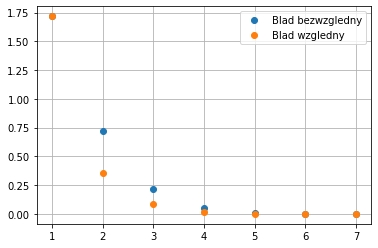

In [12]:
def exponential(x: Union[int, float], n: int) -> float:
    if isinstance(x, (int, float)) and isinstance(n, int):
        if n > 0:
            e = 0
            for i in range(n):
                e += x ** i / scipy.math.factorial(i) 
            return e
        else:
            return np.NaN
    else:
        return np.NaN

absolut = np.zeros(8)
relative = np.zeros(8)
x = np.arange(0, 8, 1)

for n in range(1, 9):
    absolut[n - 1] = main.absolut_error(exponential(1, n - 1), np.exp(1))
    relative[n - 1] = main.relative_error(exponential(1, n - 1), np.exp(1))
    print(f"Dla n = {n}, e = {exponential(1, n) } błąd bezwzględny = {main.absolut_error(np.exp(1), main.exponential(1, n)) :.8f}, błąd względny = {main.relative_error(np.exp(1), exponential(1, n)) :.8f}\n")

plt.plot(absolut,"o")
plt.plot(relative, "o")
plt.legend(["Blad bezwzgledny", "Blad wzgledny"])

plt.grid()
plt.show()

1. Występujący tutaj błąd numeryczny to błąd obcięcia. 
2. Błąd ten maleje wraz ze wzrostem ustalonej dokładności, co jest zobrazowane na wykresie

***Zadania 4.***  
Zaimplementuj 2 funkcje $coskx1$ i $coskx2$, realizujące rekurencyjnie przybliżanie wartości $cos(kx)$ w następujący sposób:

- Metoda 1:         
$cos(m+1)x = 2cosx \cdot cos(mx) - cos(m-1)x$
- Metoda 2:     
$cos(mx) = cosx \cdot cos(m-1)x - sinx \cdot sin(m-1)x$       
$sin(mx) = sinx \cdot cos(m-1)x + cosx \cdot sin(m-1)x$

Następnie przeanalizuj otrzymane rezultaty dla różnych $k$.

**Wskazówka** Do wyliczenia wartości $sin(x)$, $cos(x)$ (dla $k=1$) można użyć funkcji biblioteki numpy. 
Pozostałe wartości dla $k>1$ należy wyznaczyć rekurencyjnie.

In [4]:
def coskx1(k: int, x: Union[int, float]) -> float:
    if isinstance(k, int) and isinstance(x, (int, float)):
        if k < 0:
            return np.NaN
        elif k == 0:
            return 1
        elif k == 1:
            return np.cos(x)
        else:
            return 2 * np.cos(x) * coskx1(k - 1, x) - coskx1(k - 2, x)
    else:
        return np.NaN

def coskx2(k: int, x: Union[int, float]) -> Tuple[float, float]:
    if isinstance(k, int) and isinstance(x, (int, float)):
        if k < 0:
            return np.NaN
        elif k == 0:
            return 1, 0
        elif k == 1:
            return np.cos(x), np.sin(x)
        else:
            return np.cos(x) * coskx2(k - 1, x)[0] - np.sin(x) * coskx2(k - 1, x)[1], np.sin(x) * coskx2(k - 1, x)[0] + np.cos(x) * coskx2(k -1, x)[1]
    else:
        return np.NaN

print(f"<coskx1> x = 0, k = 1, cos(0) = {main.coskx1(1, 0)} \n")
print(f"<coskx2> x = 0, k = 1, [cos(0), sin(0)] = {main.coskx2(1, 0)} \n")
print(f"<coskx1> x = pi/2, k = 1, cos(0) = {main.coskx1(1, np.pi/2)} \n")
print(f"<coskx2> x = pi/2, k = 1, [cos(0), sin(0)] = {main.coskx2(1, np.pi/2)} \n")
print(f"<coskx1> x = pi/2, k = 2, cos(0) = {main.coskx1(2, np.pi/2)} \n")
print(f"<coskx2> x = pi/2, k = 2, [cos(0), sin(0)] = {main.coskx2(2, np.pi/2)} \n")


<coskx1> x = 0, k = 1, cos(0) = 1.0 

<coskx2> x = 0, k = 1, [cos(0), sin(0)] = (1.0, 0.0) 

<coskx1> x = pi/2, k = 1, cos(0) = 6.123233995736766e-17 

<coskx2> x = pi/2, k = 1, [cos(0), sin(0)] = (6.123233995736766e-17, 1.0) 

<coskx1> x = pi/2, k = 2, cos(0) = -1.0 

<coskx2> x = pi/2, k = 2, [cos(0), sin(0)] = (-1.0, 1.2246467991473532e-16) 



Pojawiło się tutaj kilka błędów:
- dla x = pi/2, k = 1, coskx1 powinno wyjść 0
- dla x = pi/2, k = 1, coskx2 powinno wyjść (0, 1)
- dla x = pi/2, k = 2, coskx2 powinno wyjść (-1, 0)

***Zadanie 5.***  
Wiedząc, że
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,
napisz kod w Pythonie (funkcja *pi*) obliczający przybliżenie liczby pi (nie korzystaj ze stałych <i>numpy.pi</i>, <i>math.pi</i> itp.). 

1. Z jakimi rodzajami błędów numerycznych mamy tu do czynienia? 
2. Sporządź wykresy błędów bezwzględnych i względnych w stosunku do stałej numpy.pi w zależności od wartości $n$.  

**Wskazówka** Do wizualizacji wyników użyj skali logarytmicznej.

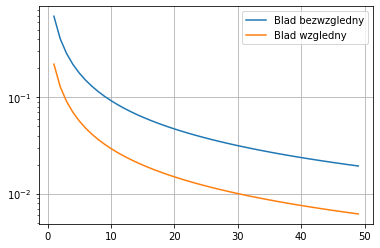

In [5]:
def pi(n: int) -> float:
    if isinstance(n, int):
        if n > 0:
            sum = 0
            for i in range(1, n + 1):
                sum += 1 / i ** 2
            return np.sqrt(6 * sum)
        else:
            return np.NaN
    else: 
        return np.NaN

absolut = np.zeros(50)
relative = np.zeros(50)
x = np.arange(0,50,1)

for n in range(50):
    absolut[n] = main.absolut_error(np.pi, pi(n))
    relative[n] = main.relative_error(np.pi, pi(n))

plt.plot(absolut)
plt.plot(relative)
plt.legend(["Blad bezwzgledny", "Blad wzgledny"])
plt.semilogy()
plt.grid()
plt.show()

 Mamy tutaj do czynienia z błędami:
- zaokrągleń - wraz ze wzrostem n, maleją kolejne wyrazy ciągu, które muszą być zaokrąglone
- obcięcia - nie jest możliwe obliczenie wszystkich wyrazów nieskończenie długiego ciągu
- reprezentacji - liczba bitów przeznaczonych na zapis liczby jest ograniczona

***Zadanie 6.***  
Używając funkcji timeit oraz memit zbadaj czas działania oraz zużycie pamięci funkcji z Zadania 4 w zalożności od różnych wartości $n$.     
Sporządź wykresy:
- czasu obliczenia danego przybliżenia liczby pi w zależności od $n$. 
W tym celu wykorzystaj funkcje [errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html) oraz zwracane przez *timeit* wartości średnie oraz ich odchylenie standardowe. 
- błędu bezwzględnego przybliżenia liczby pi od czasu jego wykonania.



**Wskazówka** Użyj opcji -o (output) dla *timeit* aby zapisać wynik do zmiennej. Opcje -r (runs) i -n (ilość pentli) decydują o ilości wykonanych prób.     
Do wizualizacji wyników użyj skali logarytmicznej.

386 ns ± 207 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
2.63 µs ± 1.23 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
4.65 µs ± 1.79 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
3.02 µs ± 561 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
6.27 µs ± 1.31 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
4.78 µs ± 502 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
7.25 µs ± 665 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
7.21 µs ± 630 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
4.78 µs ± 788 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
5.44 µs ± 578 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
5.11 µs ± 961 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
9.49 µs ± 2.86 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
6.68 µs ± 1.03 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
5.03 µs ± 442 ns per loop (mean ± std. dev. of 5 runs, 10 loops each)
6.37 µs ± 1.41 µ

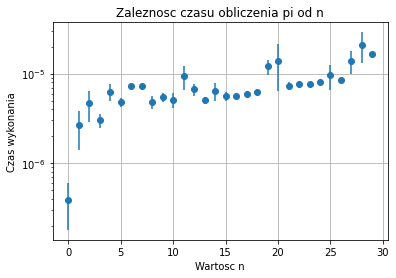

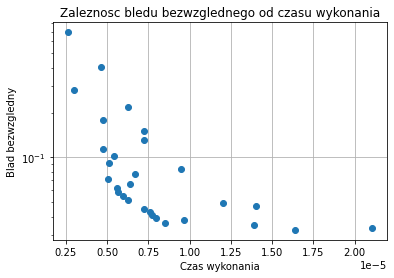

In [11]:
avg = np.zeros(30)
dev = np.zeros(30)
err = np.zeros(30)
x = np.arange(0,30,1)


for n in range(30):
    saved_timing = %timeit -r 5 -n 10 -o main.pi(n)
    avg[n] = saved_timing.average
    dev[n] =saved_timing.stdev
    err[n] = main.absolut_error(main.pi(n), np.pi)

plt.errorbar(x, avg, yerr=dev, ls="none", marker="o")
plt.title("Zaleznosc czasu obliczenia pi od n")
plt.xlabel("Wartosc n")
plt.ylabel("Czas wykonania")
plt.semilogy()
plt.grid()
plt.show()

plt.plot(avg, err, "o")
plt.title("Zaleznosc bledu bezwzglednego od czasu wykonania")
plt.xlabel("Czas wykonania")
plt.ylabel("Blad bezwzgledny")
plt.semilogy()
plt.grid()
plt.show()

Z powyższych wykresów można wywnioskować, że zależność obliczenia pi od n przypomina funkcję liniową, natomiast zależność błędu bezwzględnego od czasu wykonania przypomina funkcję wykładniczą (wykładnik mniejszy od 0) 

Wnioski:

Dokonując operacji na liczbach rzeczywistych (z rozwinięciem dziesiętnym nieskończonym), niekończonych szeregach, ciągach, całkach itp. jesteśmy "skazani" na wszelkiego rodzaju błędy numeryczne - błędy obcięcia, zaokrąglenia czy też reprezentacji. Wynikają one ograniczonej ilości bitów przeznaczonych na reprezentację danych, konwersję między systemami liczbowymi, trudnością wykonywania operacji na bardzo małych i dużych liczbach, oraz zaokrągleniami spowodowanymi reprezentacją danych.
Z większością błędów numerycznych można było się spotkać podczas tych laboratoriów. Do ich analizy użyto wcześniej napisanych funkcji absolut_error oraz relative_error, które zwracały błąd bezwzględny oraz względny. Przy pomocy biblioteki matplotlib błędy te także przedstawiono na wykresach oraz poddano analizie.